# Observe

In [168]:
import os
import argparse
import numpy as np
import pickle
from collections import Counter

In [169]:
import os
import numpy as np
import pickle
from collections import Counter

def describe_array(arr):
    desc = {
        'dtype': str(arr.dtype),
        'shape': arr.shape,
        'min': float(np.min(arr)) if arr.size > 0 else None,
        'max': float(np.max(arr)) if arr.size > 0 else None,
        'mean': float(np.mean(arr)) if arr.size > 0 else None,
        'size': arr.size,
        'nbytes': arr.nbytes
    }
    return desc


def describe_list(lst):
    cnt = Counter(lst)
    most_common = cnt.most_common(5)
    desc = {
        'total': len(lst),
        'unique': len(cnt),
        'most_common': most_common
    }
    return desc


def validate_split(input_dir, split_name):
    print(f"=== Validating split: {split_name} ===")
    data_path = os.path.join(input_dir, f"{split_name}_data.npy")
    label_path = os.path.join(input_dir, f"{split_name}_label.pkl")
    class_path = os.path.join(input_dir, f"{split_name}_class_name.pkl")

    # Validate data
    if os.path.exists(data_path):
        data = np.load(data_path)
        d_desc = describe_array(data)
        print("Data:")
        for k, v in d_desc.items():
            print(f"  {k}: {v}")
        
        # Thêm mô tả chi tiết các chiều của dữ liệu sau khi tiền xử lý
        if len(data.shape) == 5:
            N, C, T, V, M = data.shape
            print(f"  Dimensions: Samples={N}, Channels={C} (x,y,z), Frames={T}, Joints={V}, Persons={M}")

    else:
        print(f"Data file not found: {data_path}")

    # Validate labels
    if os.path.exists(label_path):
        with open(label_path, 'rb') as f:
            labels = pickle.load(f)
        l_desc = describe_list(labels)
        print("Labels:")
        for k, v in l_desc.items():
            print(f"  {k}: {v}")
    else:
        print(f"Label file not found: {label_path}")

    # Validate class names
    if os.path.exists(class_path):
        with open(class_path, 'rb') as f:
            classes = pickle.load(f)
        c_desc = describe_list(classes)
        print("Class names:")
        for k, v in c_desc.items():
            print(f"  {k}: {v}")
    else:
        print(f"Class names file not found: {class_path}")
    print()

In [170]:
# input_dir = '/workspace/data/npy_data'

In [171]:
input_dir = '/workspace/data/npy_splits_new'

In [172]:
validate_split(input_dir, 'train')

=== Validating split: train ===
Data:
  dtype: float32
  shape: (18823, 3, 24, 61, 1)
  min: -1.569000005722046
  max: 6.8919997215271
  mean: 0.10461992770433426
  size: 82670616
  nbytes: 330682464
  Dimensions: Samples=18823, Channels=3 (x,y,z), Frames=24, Joints=61, Persons=1
Labels:
  total: 18823
  unique: 2139
  most_common: [(29, 11), (32, 11), (39, 11), (50, 11), (66, 11)]
Class names:
  total: 18823
  unique: 2139
  most_common: [('bao_tay_dùng_cho_trẻ_sơ_sinh', 11), ('biểu_thị', 11), ('buông_mànB', 11), ('buổi_tốiT', 11), ('bánh_xe', 11)]



In [173]:
validate_split(input_dir, 'val')

=== Validating split: val ===
Data:
  dtype: float32
  shape: (4706, 3, 24, 61, 1)
  min: -0.9369999766349792
  max: 5.094000339508057
  mean: 0.10497162491083145
  size: 20668752
  nbytes: 82675008
  Dimensions: Samples=4706, Channels=3 (x,y,z), Frames=24, Joints=61, Persons=1
Labels:
  total: 4706
  unique: 1969
  most_common: [(136, 7), (339, 7), (1924, 7), (277, 6), (305, 6)]
Class names:
  total: 4706
  unique: 1969
  most_common: [('bảo_vệ_môi_trườngT', 7), ('chữa_bàiB', 7), ('va_li', 7), ('chùaN', 6), ('chất_dẻo', 6)]



In [174]:
validate_split(input_dir, 'test')

=== Validating split: test ===
Data:
  dtype: float32
  shape: (2139, 3, 24, 61, 1)
  min: -0.38243699073791504
  max: 0.7871913909912109
  mean: 0.08354132622480392
  size: 9394488
  nbytes: 37577952
  Dimensions: Samples=2139, Channels=3 (x,y,z), Frames=24, Joints=61, Persons=1
Labels:
  total: 2139
  unique: 2139
  most_common: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]
Class names:
  total: 2139
  unique: 2139
  most_common: [('7', 1), ('a', 1), ('aiB', 1), ('aiT', 1), ('an_giang', 1)]



### Inspect

In [175]:
def inspect_npy(file_path, num_samples=3, num_joints=5):
    """
    Load .npy file và in ra một số thông tin cũng như giá trị mẫu.
    
    Args:
        file_path (str): đường dẫn tới file test_data.npy
        num_samples (int): số sample đầu in ra
        num_joints (int): số joint đầu mỗi frame in ra
    """
    data = np.load(file_path)  # shape (N,3,20,61,1)
    print(f"Loaded data: shape={data.shape}, dtype={data.dtype}")
    
    N, C, T, V, M = data.shape
    print(f"- Samples: {N}, Channels: {C} (x,y,z), Frames: {T}, Joints: {V}, Persons: {M}\n")
    
    # In thử mẫu đầu tiên
    for i in range(min(num_samples, N)):
        print(f"Sample {i}:")
        # In bộ xyz của frame 0, joint 0..num_joints-1, person 0
        snippet = data[i, :, 0, :num_joints, 0]
        # snippet shape = (3, num_joints)
        # mỗi cột tương ứng [x,y,z] của joint j
        for j in range(snippet.shape[1]):
            x, y, z = snippet[:, j]
            print(f"  Joint {j}: x={x:.4f}, y={y:.4f}, z={z:.4f}")
        print()

In [176]:
test_npy = f'{input_dir}/test_data.npy'

In [177]:
inspect_npy(test_npy, num_samples=2, num_joints=5)

Loaded data: shape=(2139, 3, 24, 61, 1), dtype=float32
- Samples: 2139, Channels: 3 (x,y,z), Frames: 24, Joints: 61, Persons: 1

Sample 0:
  Joint 0: x=-0.1181, y=0.5906, z=0.0000
  Joint 1: x=-0.1015, y=0.6055, z=0.0000
  Joint 2: x=-0.0916, y=0.6329, z=0.0000
  Joint 3: x=-0.0789, y=0.6560, z=0.0000
  Joint 4: x=-0.0627, y=0.6684, z=0.0000

Sample 1:
  Joint 0: x=-0.1991, y=0.5917, z=0.0000
  Joint 1: x=-0.1866, y=0.6030, z=0.0000
  Joint 2: x=-0.1814, y=0.6211, z=0.0000
  Joint 3: x=-0.1843, y=0.6353, z=0.0000
  Joint 4: x=-0.1899, y=0.6447, z=0.0000



### Visualize

In [178]:
%matplotlib inline

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
from IPython.display import clear_output

In [180]:
def plot_world_landmarks(ax, left, right, body, interval=0.1):
    """Vẽ 3D skeleton của tay và thân."""
    ax.cla()
    hand_segment = [
        [0,1,2,3,4], [0,5,6,7,8], [5,9,13,17],
        [9,10,11,12], [13,14,15,16], [0,17,18,19,20]
    ]
    pose_segment = [
        [0,1,2,3], [0,4,5,6]
    ]  # cho 19-body joints

    # Vẽ tay trái & tay phải
    for seg in hand_segment:
        valid_l = [i for i in seg if i < len(left)]
        if len(valid_l) > 1:
            xs = [left[i][0] for i in valid_l]
            ys = [left[i][1] for i in valid_l]
            zs = [left[i][2] for i in valid_l]
            ax.plot(xs, ys, zs, 'b-', lw=2)
        valid_r = [i for i in seg if i < len(right)]
        if len(valid_r) > 1:
            xs = [right[i][0] for i in valid_r]
            ys = [right[i][1] for i in valid_r]
            zs = [right[i][2] for i in valid_r]
            ax.plot(xs, ys, zs, 'r-', lw=2)

    # Vẽ thân
    for seg in pose_segment:
        valid = [i for i in seg if i < len(body)]
        if len(valid) > 1:
            xs = [body[i][0] for i in valid]
            ys = [body[i][1] for i in valid]
            zs = [body[i][2] for i in valid]
            ax.plot(xs, ys, zs, 'g-', lw=2)

    # Scatter điểm
    for arr, c, s in [(left,'blue',30), (right,'red',30), (body,'green',40)]:
        pts = np.array([p for p in arr if not np.allclose(p,0)])
        if pts.size:
            ax.scatter(pts[:,0], pts[:,1], pts[:,2], c=c, s=s)

    ax.view_init(elev=90, azim=90)
    plt.draw()
    plt.pause(interval)

In [181]:
def visualize_sequence(data, sample_idx=0, interval=0.1):
    sample = data[sample_idx].squeeze(-1)  # (3, T, 61)
    T = sample.shape[1]

    left_inds  = list(range(21))
    right_inds = list(range(21,42))
    body_inds  = list(range(42,61))

    for t in range(T):
        coords = sample[:,t,:].T  # (61,3)
        left  = coords[left_inds]
        right = coords[right_inds]
        body  = coords[body_inds]

        # Xóa output trước đó
        clear_output(wait=True)
        # Vẽ lại
        fig = plt.figure(figsize=(6,5))
        ax  = fig.add_subplot(111, projection='3d')
        ax.set_xlim(-0.5, 0.5)
        ax.set_ylim(-0.5, 0.5)
        ax.set_zlim(-0.5, 0.5)

        # Vẽ skeleton (gọi lại hàm plot_world_landmarks của bạn)
        plot_world_landmarks(ax, left, right, body)
        ax.set_title(f'Frame {t+1}/{T}')

        plt.show()
        # Tạm dừng giữa các frame
        time.sleep(interval)

In [182]:
pred_class_names = np.load(f'{input_dir}/class_names.npy', allow_pickle=True)
# gt_class_names = np.load('/workspace/npy_converted_full/transformed/mediapipe61/class_names.npy', allow_pickle=True)

In [198]:
sample_idx = 0

# Lấy chỉ số nhãn (label index) từ kết quả đã tải
label = pred_class_names[sample_idx]

# --- 3. In kết quả ---
print(f"Label: {label}")

Label: 7


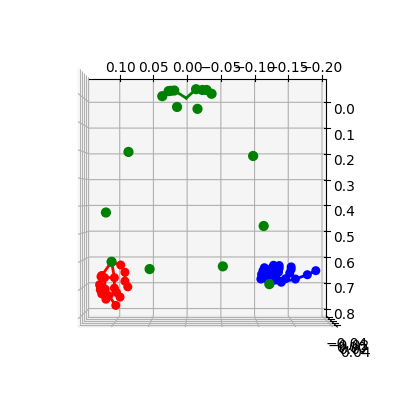

In [209]:
data = np.load(f'{input_dir}/train_data.npy')
visualize_sequence(data, sample_idx=9 + sample_idx*10, interval=0.0001)